In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
sys.path.append(os.path.abspath("../"))

In [3]:
from utils.visualizations import *
from utils.feature_engineering import *
from utils.preprocessing import *

In [4]:


df = pd.read_csv("../data/instagram_data.csv", encoding = 'utf-8', encoding_errors="ignore")
(df.head())

,Unnamed: 0,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Timestamp,Content Type
0,0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance�#money�#business�#investing�#investme...,2024-05-14 22:59:29.747899160,carousel
1,1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare�#health�#covid�#data�#datascience�...,2024-05-24 03:49:54.957983192,carousel
2,2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data�#datascience�#dataanalysis�#dataanalytic...,2024-01-13 06:27:13.613445378,image
3,3,4528,2700,621,932,73,172,10,7,213,23,8,Here�s how you can write a Python program to d...,#python�#pythonprogramming�#pythonprojects�#py...,2024-06-17 16:44:22.184873950,carousel
4,4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization�#datascience�#data�#dataana...,2024-03-20 17:56:58.487394958,video


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
Timestamp         0
Content Type      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
 13  Timestamp       119 non-null    object
 14  Content Type    119 non-null    object
dtypes: int64(11), object(4)
memory usage: 14.1+ KB


In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

array([[<Axes: title={'center': 'Impressions'}>,
        <Axes: title={'center': 'From Home'}>,
        <Axes: title={'center': 'From Hashtags'}>],
       [<Axes: title={'center': 'From Explore'}>,
        <Axes: title={'center': 'From Other'}>,
        <Axes: title={'center': 'Saves'}>],
       [<Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Shares'}>,
        <Axes: title={'center': 'Likes'}>],
       [<Axes: title={'center': 'Profile Visits'}>,
        <Axes: title={'center': 'Follows'}>,
        <Axes: title={'center': 'Timestamp'}>]], dtype=object)

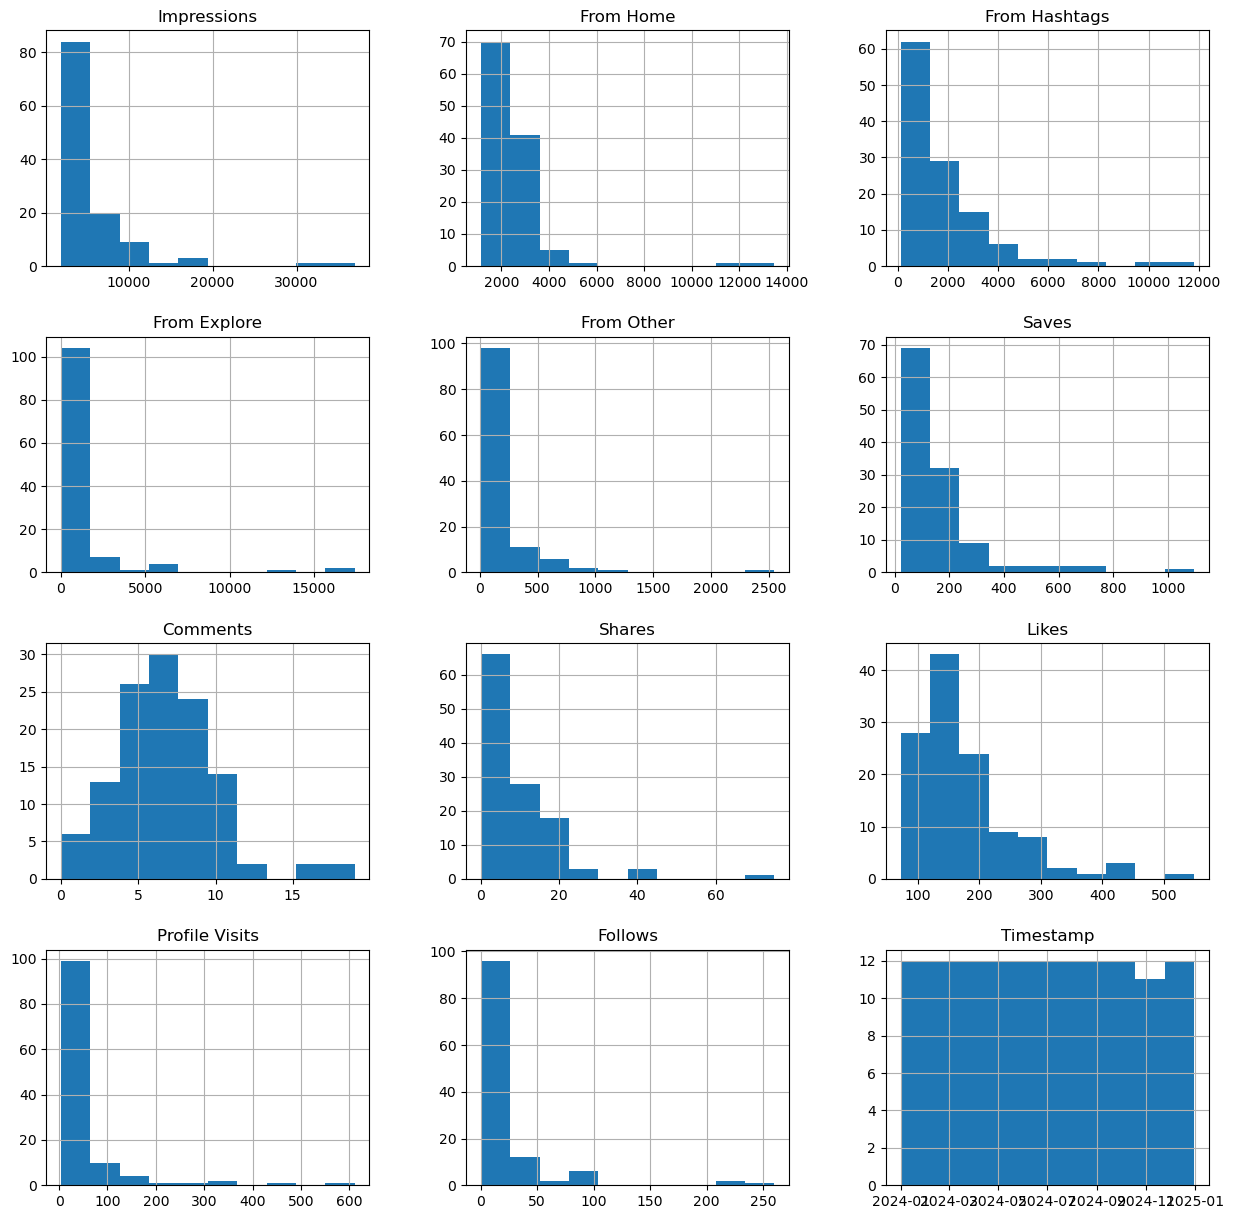

In [12]:
df.hist(figsize=(15, 15))

In [13]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
others = df["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore", "From Others"]
values = [home, hashtags, explore, others]

fig = px.pie(df, values= values, names= labels, title= "Impressions From Instagram Posts")
plt.figure(figsize=(10, 8))
fig.show()

<Figure size 1000x800 with 0 Axes>

In [14]:

df_2 = df.copy()
columns = ['Caption', 'Hashtags', 'Content Type', ]
df_2 = df_2.drop(columns, axis=1)
correlation = df_2.corr()
corre = correlation["Impressions"].sort_values(ascending= False)
print(corre)


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Timestamp         0.079877
Comments         -0.028524
Name: Impressions, dtype: float64


In [28]:
num = df.select_dtypes(include = [np.number]).columns.tolist()
skewness_results = {}
for col in num:
    skewness_results[col] = df[col].skew()
sk = pd.DataFrame([skewness_results])
print(sk)

   Impressions  From Home  From Hashtags  From Explore  From Other     Saves  \
0     4.181965   5.644823       2.575349      4.760815    5.387432  3.134132   

   Comments    Shares     Likes  Profile Visits  Follows  
0  0.943257  3.155322  1.753394        4.193073  4.03982  


In [15]:
def conversion_rate():
    """in instagram conversion Rate means how mnay followers you get
        from the number of profile visits from a post
    """
    conversion_rate= (df["Follows"].sum() / df["Profile Visits"].sum()) *100
    print(f'Conversion Rate: {conversion_rate}')


In [16]:
conversion_rate()

Conversion Rate: 41.00265604249668


Conversion rate tells us that little over 41% of users that visit the account profile from a post, end up following the account

In [29]:
df["Caption"] = df["Caption"].apply(clean_text)
df["Hashtags"] = df["Hashtags"].apply(clean_hashtages)

In [30]:
df[["Caption", "Hashtags"]].head()

,Caption,Hashtags
0,important data visualization every financial d...,#finance#money#business#investing#investment#t...
1,best data science project idea healthcare want...,#healthcare#health#covid#data#datascience#data...
2,learn train machine learning model giving inpu...,#data#datascience#dataanalysis#dataanalytics#d...
3,here write python program detect whether sente...,#python#pythonprogramming#pythonprojects#pytho...
4,plotting annotation visualizing data considere...,#datavisualization#datascience#data#dataanalyt...


In [31]:
add_caption_length(df=df)
add_day_of_week(df=df, timestamp_col="Timestamp")
add_engagement_rate(df=df)
add_hashtag_count(df=df)
add_hashtag_density(df)
add_source_ratios(df)
add_is_weekend(df)
add_month(df=df, timestamp_col="Timestamp")
add_hour_of_day(df=df, timestamp_col="Timestamp")
df["NumOfHashtags"] = df["Hashtags"].apply(count_hashtags)

In [32]:
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,...,HashtagCount,HashtagDensity,FromHomeRatio,FromHashtagsRatio,FromExploreRatio,FromOtherRatio,IsWeekend,Month,HourOfDay,NumOfHashtags
0,3920,2586,1028,619,56,98,9,5,162,35,...,1,0.111111,0.659694,0.262245,0.157908,0.014286,0,5,22,22
1,5394,2727,1838,1174,78,194,7,14,224,48,...,1,0.055556,0.505562,0.340749,0.217649,0.014461,0,5,3,18
2,4021,2085,1188,0,533,41,11,1,131,62,...,1,0.071429,0.518528,0.295449,0.000000,0.132554,1,1,6,18


In [33]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,...,HashtagCount,HashtagDensity,FromHomeRatio,FromHashtagsRatio,FromExploreRatio,FromOtherRatio,IsWeekend,Month,HourOfDay,NumOfHashtags
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.0,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,...,1.0,0.086992,0.509610,0.318108,0.122876,0.029767,0.285714,6.453782,11.235294,18.957983
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,...,1.0,0.013333,0.104449,0.031917,0.000000,0.003254,0.000000,1.000000,0.000000,10.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,...,1.0,0.042572,0.387485,0.192586,0.037819,0.011000,0.000000,3.500000,5.000000,17.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,...,1.0,0.066667,0.505562,0.293278,0.073385,0.015520,0.000000,6.000000,11.000000,18.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,...,1.0,0.125000,0.632902,0.434106,0.139266,0.030413,1.000000,9.000000,17.000000,21.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,...,1.0,0.333333,0.918655,0.739636,0.699430,0.190843,1.000000,12.000000,23.000000,30.000000
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,...,0.0,0.054802,0.170949,0.173941,0.133514,0.036187,0.453664,3.468375,6.931512,4.861462


c:\Users\HP\Jupyter projects\Instagram Reach Analysis\utils\visualizations.py:108: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




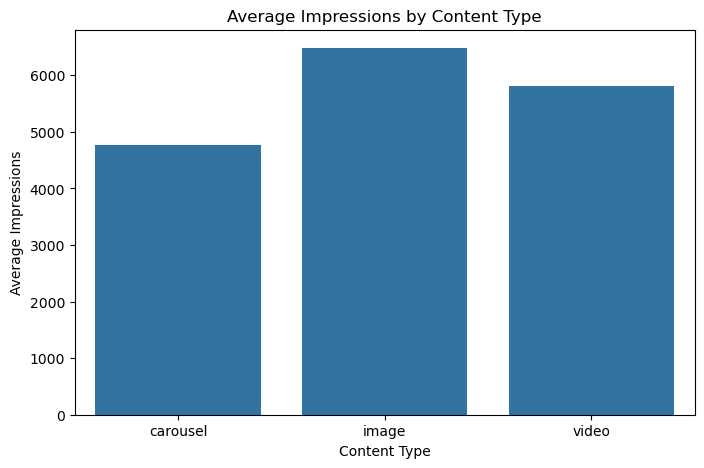

In [34]:
plot_avg_impressions_by_content(df=df, content_col="Content Type", target_col="Impressions")

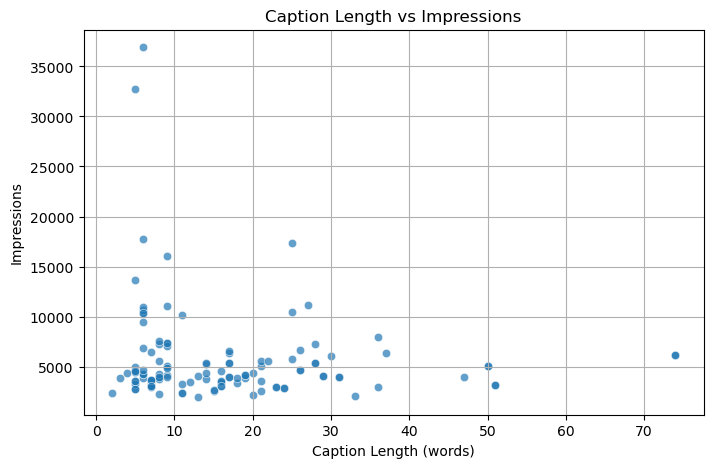

In [35]:
plot_caption_length_vs_impressions(df=df, caption_length_col="CaptionLength", target_col="Impressions")

In [39]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,...,HashtagCount,HashtagDensity,FromHomeRatio,FromHashtagsRatio,FromExploreRatio,FromOtherRatio,IsWeekend,Month,HourOfDay,NumOfHashtags
0,3920,2586,1028,619,56,98,9,5,162,35,...,1,0.111111,0.659694,0.262245,0.157908,0.014286,0,5,22,22
1,5394,2727,1838,1174,78,194,7,14,224,48,...,1,0.055556,0.505562,0.340749,0.217649,0.014461,0,5,3,18
2,4021,2085,1188,0,533,41,11,1,131,62,...,1,0.071429,0.518528,0.295449,0.000000,0.132554,1,1,6,18
3,4528,2700,621,932,73,172,10,7,213,23,...,1,0.058824,0.596290,0.137147,0.205830,0.016122,0,6,16,11
4,2518,1704,255,279,37,96,5,4,123,8,...,1,0.062500,0.676728,0.101271,0.110802,0.014694,0,3,17,29


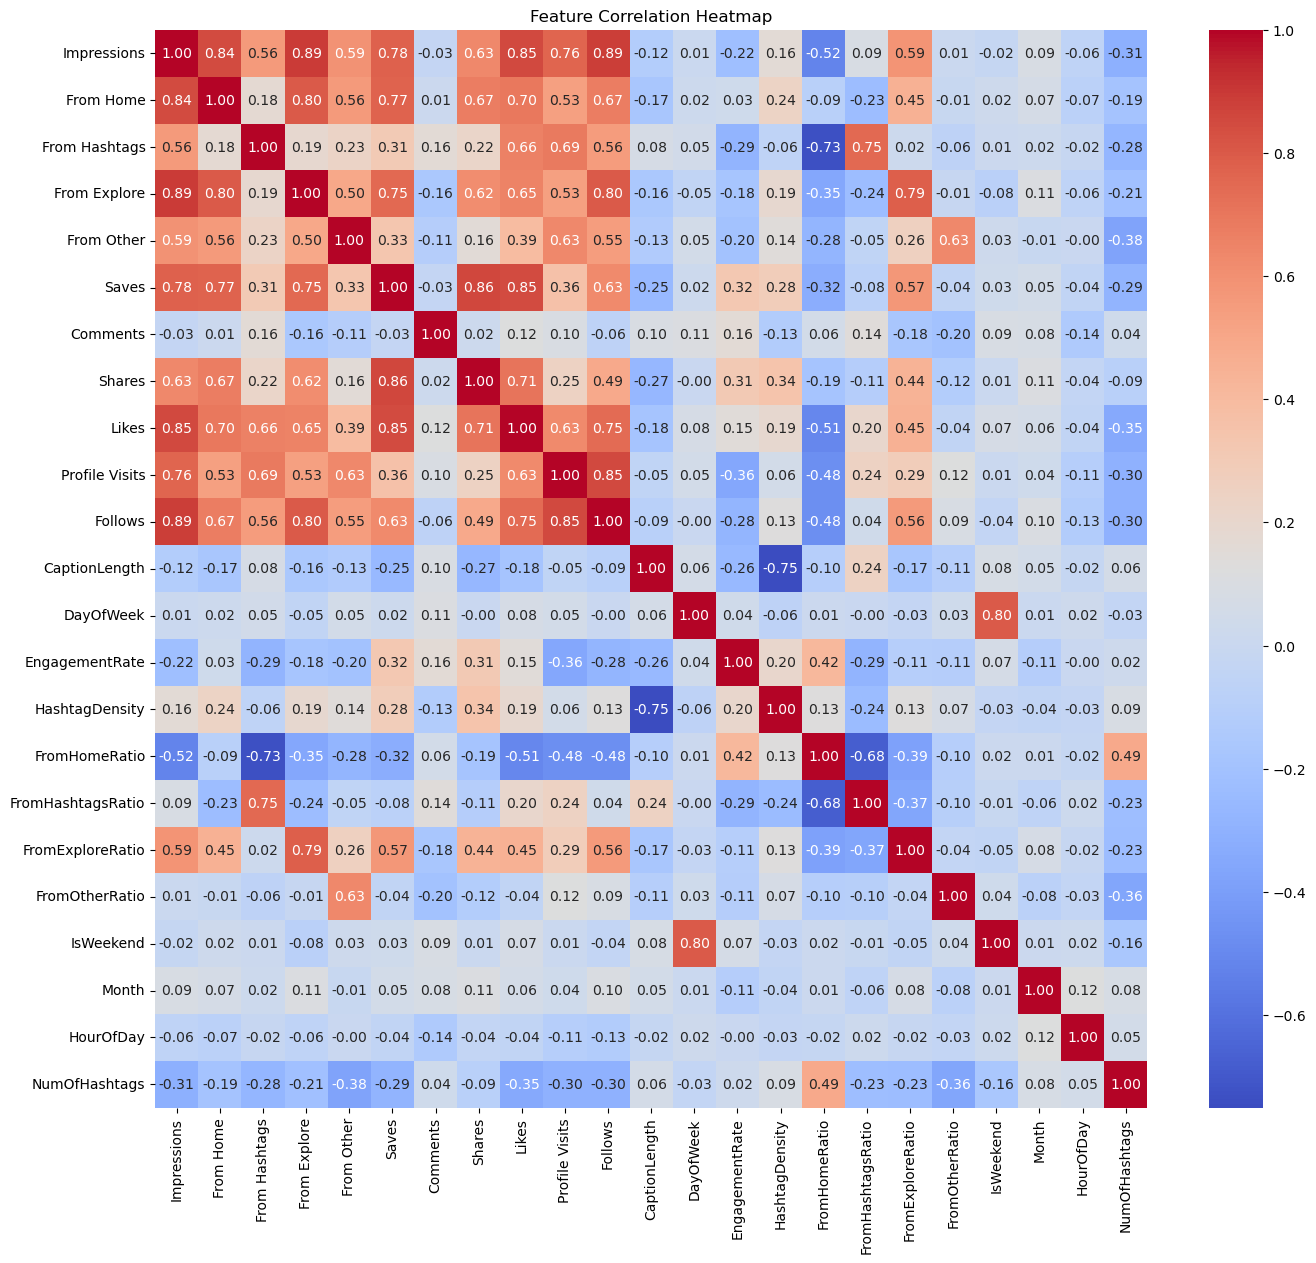

In [42]:
df_c = df.copy()
data = df_c.drop("HashtagCount", axis=1)
plot_correlation_heatmap(df=data, cols=data.select_dtypes(include=[np.number]).columns)

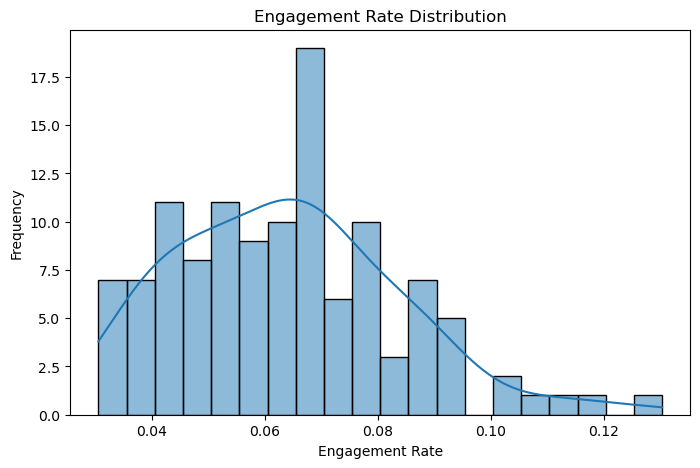

In [43]:
plot_engagement_rate_distribution(df=df, engagement_rate_col="EngagementRate")

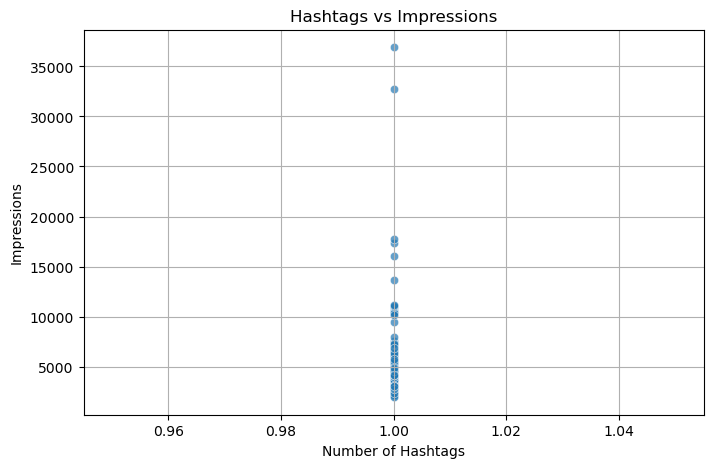

In [44]:
plot_hashtags_vs_impressions(df=df, hashtag_count_col="HashtagCount", target_col="Impressions")

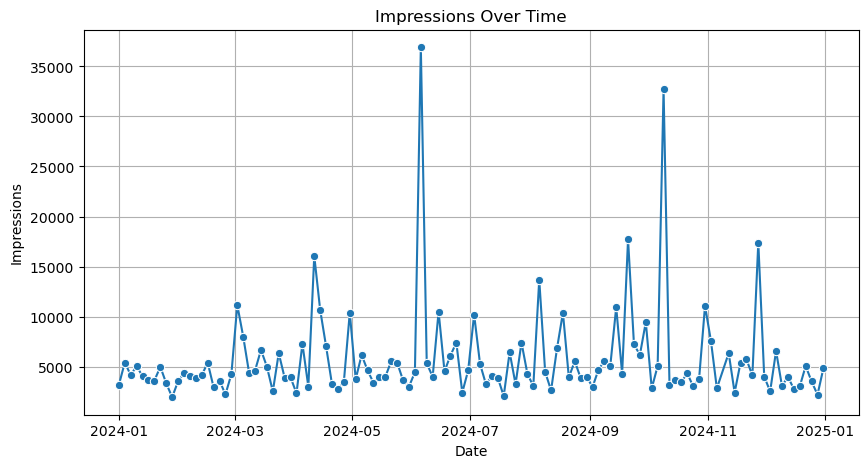

In [45]:
plot_impressions_over_time(df=df, date_col="Timestamp", target_col="Impressions")

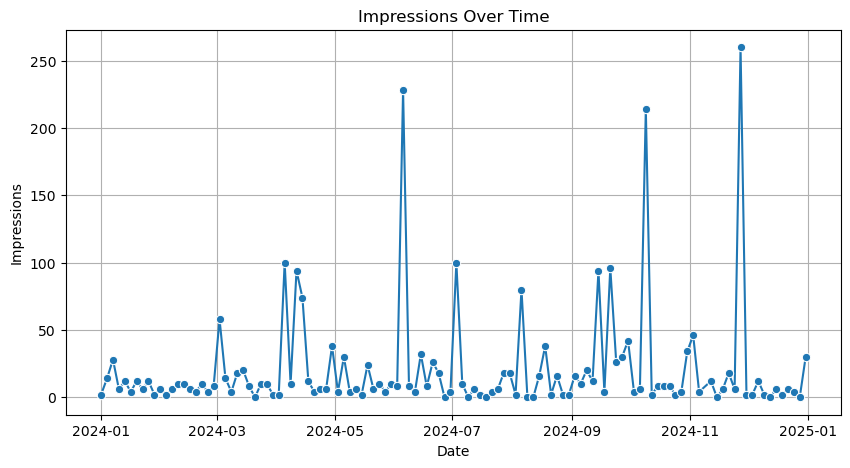

In [46]:
plot_impressions_over_time(df=df, date_col="Timestamp", target_col="Follows")

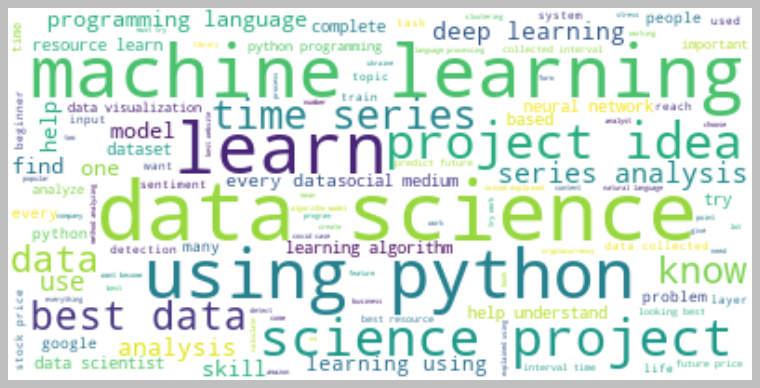

In [47]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
ols_plot(data=df, column_x="Likes", column_y="Impressions", title="Trend for Likes VS Impressions")

In [49]:
ols_plot(data=df, column_x="Saves", column_y="Impressions", title="Trend for Saves vs Impressions")

In [50]:
ols_plot(data=df, column_x="Shares", column_y="Impressions", title="Trend for Shares vs Impressions")

In [51]:
ols_plot(data=df, column_x="Comments", column_y="Impressions", title="Trend for Comments vs Impressions")

In [52]:
df.to_csv("../data/processed/clean_data.csv")

In [34]:
['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
 'Caption', 'Hashtags',
 'Timestamp', 'DayOfWeek', 'HourOfDay', 'IsWeekend', 'Month',
 'ContentType', 'EngagementRate', 'HashtagCount', 'CaptionLength',
 'HashtagDensity', 'FromHomeRatio', 'FromHashtagsRatio', 'FromExploreRatio', 'FromOtherRatio']


['Impressions',
 'From Home',
 'From Hashtags',
 'From Explore',
 'From Other',
 'Saves',
 'Comments',
 'Shares',
 'Likes',
 'Profile Visits',
 'Follows',
 'Caption',
 'Hashtags',
 'Timestamp',
 'DayOfWeek',
 'HourOfDay',
 'IsWeekend',
 'Month',
 'ContentType',
 'EngagementRate',
 'HashtagCount',
 'CaptionLength',
 'HashtagDensity',
 'FromHomeRatio',
 'FromHashtagsRatio',
 'FromExploreRatio',
 'FromOtherRatio']